In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-(X.dot(W1) + b1)))
    activation = Z.dot(W2) + b2
    Y = 1 / (1 + np.exp(-activation))
    return Y, Z

In [3]:
def predict(X, W1, b1, W2, b2):
    Y, _ = forward(X, W1, b1, W2, b2)
    return np.round(Y)

In [4]:
def derivative_W2(Z, T, Y):
    return (T - Y).dot(Z)

In [5]:
def derivative_b2(T, Y):
    return (T - Y).sum()

In [6]:
def derivative_W1(X, Z, T, Y, W2):
    # Sigmoid:
    # dZ = np.outer(T - Y, W2) * Z * (1 - Z)
    # Tanh:
    dZ = np.outer(T - Y, W2) * (1 - Z * Z)
    return X.T.dot(dZ)

In [7]:
def derivative_b1(Z, T, Y, W2):
    dZ = np.outer(T - Y, W2) * (1 - Z * Z)
    return dZ.sum(axis = 0)

In [8]:
def cost(T, Y):
    tot = 0
    for n in range(len(T)):
        if T[n] == 1:
            tot += np.log(Y[n])
        else:
            tot += np.log(1 - Y[n])
    return tot

In [9]:
def test_xor():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 0])
    W1 = np.random.randn(2, 4)
    b1 = np.random.randn(4)
    W2 = np.random.randn(4)
    b2 = np.random.randn(1)
    LL = [] # track likelihoods
    eta = 0.0005
    reg = 0.
    last_error_rate = None
    
    for i in range(100000):
        pY, Z = forward(X, W1, b1, W2, b2)
        ll = cost(Y, pY)
        pred = predict(X, W1, b1, W2, b2)
        err = np.abs(pred - Y).mean()
        
        if err != last_error_rate:
            last_error_rate = err
            print('error rate:', err)
            print('true:', Y)
            print('pred:', pred)
        if LL and ll < LL[-1]:
            print('early exit')
            break
        LL.append(ll)
        
        # Gradient descent
        W2 += eta * (derivative_W2(Z, Y, pY) - reg * W2)
        b2 += eta * (derivative_b2(Y, pY) - reg * b2)
        W1 += eta * (derivative_W1(X, Z, Y, pY, W2) - reg * W1)
        b1 += eta * (derivative_b1(Z, Y, pY, W2) - reg * b1)
        
        if i% 10000 == 0:
            print('Log-Likelihood:', ll)
    print('Final accuracy:', 1 - np.abs(pred - Y).mean())
    plt.plot(LL)

In [14]:
def test_doughnut(n_hidden = 8):
    N = 1000
    r_inner = 5
    r_outer = 10
    
    R1 = np.random.randn(N // 2) + r_inner
    theta = 2 * np.pi * np.random.random(N // 2)
    X_inner = np.concatenate(
        [[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T
    
    R2 = np.random.randn(N // 2) + r_outer
    theta = 2 * np.pi * np.random.random(N // 2)
    X_outer = np.concatenate(
        [[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T
    
    X = np.concatenate([X_inner, X_outer])
    Y = np.array([0] * (N // 2) + [1] * (N // 2))  
    
    #n_hidden = 8
    W1 = np.random.randn(2, n_hidden)
    b1 = np.random.randn(n_hidden)
    W2 = np.random.randn(n_hidden)
    b2 = np.random.randn(1)
    LL = [] # track likelihoods
    eta = 0.00005
    reg = 0.
    last_error_rate = None
    
    for i in range(500000):
        pY, Z = forward(X, W1, b1, W2, b2)
        ll = cost(Y, pY)
        pred = predict(X, W1, b1, W2, b2)
        err = np.abs(pred - Y).mean()
        LL.append(ll)
        
        # Gradient descent
        W2 += eta * (derivative_W2(Z, Y, pY) - reg * W2)
        b2 += eta * (derivative_b2(Y, pY) - reg * b2)
        W1 += eta * (derivative_W1(X, Z, Y, pY, W2) - reg * W1)
        b1 += eta * (derivative_b1(Z, Y, pY, W2) - reg * b1)
        
        if i% 5000 == 0:
            print('Log-Likelihood:', ll, '\tAccuracy:', 1 - err)
    
    plt.plot(LL)

error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  1.  1.]
Log-Likelihood: -3.3720157422
error rate: 0.75
true: [0 1 1 0]
pred: [ 1.  1.  0.  1.]
error rate: 0.5
true: [0 1 1 0]
pred: [ 0.  1.  0.  1.]
Log-Likelihood: -2.71652048556
Log-Likelihood: -2.68948923779
Log-Likelihood: -2.62726953462
error rate: 0.25
true: [0 1 1 0]
pred: [ 0.  1.  0.  0.]
Log-Likelihood: -2.52522158603
Log-Likelihood: -2.41112493094
Log-Likelihood: -2.17216927295
error rate: 0.0
true: [0 1 1 0]
pred: [ 0.  1.  1.  0.]
Log-Likelihood: -1.96350137048
Log-Likelihood: -1.78745971766
Log-Likelihood: -1.61225096565
Final accuracy: 1.0


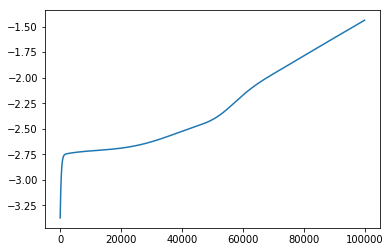

In [31]:
test_xor()

Log-Likelihood: -1281.47934265 	Accuracy: 0.503
Log-Likelihood: -686.43740657 	Accuracy: 0.538
Log-Likelihood: -683.878253837 	Accuracy: 0.556
Log-Likelihood: -682.448854629 	Accuracy: 0.555
Log-Likelihood: -681.607523914 	Accuracy: 0.561
Log-Likelihood: -680.465240895 	Accuracy: 0.567
Log-Likelihood: -679.525409562 	Accuracy: 0.571
Log-Likelihood: -678.664533979 	Accuracy: 0.575
Log-Likelihood: -677.838876488 	Accuracy: 0.584
Log-Likelihood: -677.094434914 	Accuracy: 0.591
Log-Likelihood: -676.417494524 	Accuracy: 0.596
Log-Likelihood: -675.779752939 	Accuracy: 0.598
Log-Likelihood: -675.176713795 	Accuracy: 0.603
Log-Likelihood: -674.613898824 	Accuracy: 0.606
Log-Likelihood: -674.0985753 	Accuracy: 0.61
Log-Likelihood: -673.643374936 	Accuracy: 0.616
Log-Likelihood: -673.242344784 	Accuracy: 0.625
Log-Likelihood: -672.886570855 	Accuracy: 0.632
Log-Likelihood: -672.57059337 	Accuracy: 0.634
Log-Likelihood: -672.290309926 	Accuracy: 0.633
Log-Likelihood: -672.042285523 	Accuracy: 0.6

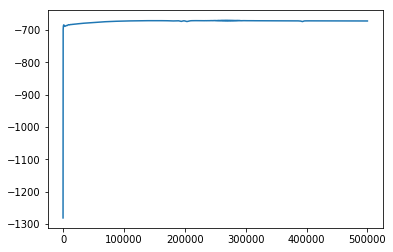

In [13]:
test_doughnut()

Log-Likelihood: -788.976781879 	Accuracy: 0.5
Log-Likelihood: -692.462876741 	Accuracy: 0.518
Log-Likelihood: -692.324810369 	Accuracy: 0.519
Log-Likelihood: -692.135893538 	Accuracy: 0.522


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Log-Likelihood: -692.077881684 	Accuracy: 0.522
Log-Likelihood: -692.00713934 	Accuracy: 0.523
Log-Likelihood: -692.048066848 	Accuracy: 0.523
Log-Likelihood: -692.136361155 	Accuracy: 0.521
Log-Likelihood: -692.169032938 	Accuracy: 0.52
Log-Likelihood: -692.186520601 	Accuracy: 0.521
Log-Likelihood: -692.185799641 	Accuracy: 0.521
Log-Likelihood: -692.179922598 	Accuracy: 0.521
Log-Likelihood: -692.172962956 	Accuracy: 0.521
Log-Likelihood: -692.165969403 	Accuracy: 0.521
Log-Likelihood: -692.159162272 	Accuracy: 0.521
Log-Likelihood: -692.152570386 	Accuracy: 0.521
Log-Likelihood: -692.146202566 	Accuracy: 0.521
Log-Likelihood: -692.140092523 	Accuracy: 0.521
Log-Likelihood: -692.134307264 	Accuracy: 0.521
Log-Likelihood: -692.128938093 	Accuracy: 0.521
Log-Likelihood: -692.124074336 	Accuracy: 0.521
Log-Likelihood: -692.119760032 	Accuracy: 0.521
Log-Likelihood: -692.115944705 	Accuracy: 0.521
Log-Likelihood: -692.112450348 	Accuracy: 0.521
Log-Likelihood: -692.108971555 	Accuracy: 

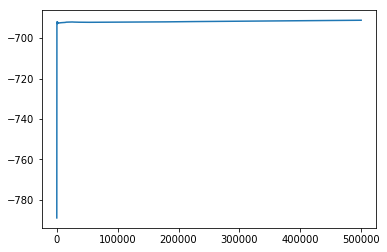

In [15]:
test_doughnut(n_hidden = 4)